In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
features_file = './data/lyrl2004_vectors_train.dat'
labels_file = './data/rcv1-v2.topics.qrels'

features  = open(features_file,'r')
labels = open(labels_file,'r')
out = open('./data/labels_balanced.txt','w')

In [29]:
ids = [(i.split(' ')[0]) for i in features.readlines()]

In [30]:
ids[0:5], len(ids)

(['2286', '2287', '2288', '2289', '2290'], 23149)

In [31]:
labels_lines = []

for elem in labels.readlines():
    line = elem.split(' ')
    
    labels_lines.append((line[1], line[0]))

In [32]:
labels_lines[0:5], len(labels_lines)

([('2286', 'E11'),
  ('2286', 'ECAT'),
  ('2286', 'M11'),
  ('2286', 'M12'),
  ('2286', 'MCAT')],
 2606875)

In [33]:
labels_dict = {}

for elem in labels_lines:
    if labels_dict.get(elem[0]) == None:
        labels_dict[elem[0]] = []
                       
    labels_dict[elem[0]].append(elem[1])

In [34]:
labels_dict['2286']

['E11', 'ECAT', 'M11', 'M12', 'MCAT']

In [35]:
train_all_labels = []

for id_ in ids:
    train_all_labels.extend(labels_dict[id_])

In [36]:
label_counts = [(x, train_all_labels.count(x)) for x in set(train_all_labels)]
label_counts.sort(key=lambda x: x[1])
print(label_counts)

[('G159', 2), ('G156', 2), ('E313', 3), ('GFAS', 6), ('E142', 8), ('E141', 12), ('GOBIT', 13), ('E61', 15), ('E132', 17), ('GTOUR', 23), ('C331', 31), ('E143', 34), ('G152', 35), ('GSCI', 37), ('G155', 38), ('E411', 40), ('C313', 41), ('E311', 43), ('C32', 43), ('G157', 45), ('G151', 49), ('C16', 49), ('GWELF', 51), ('G158', 52), ('E513', 54), ('G153', 59), ('C23', 62), ('E14', 65), ('E31', 66), ('C173', 76), ('GODD', 90), ('GREL', 92), ('E121', 94), ('E511', 102), ('GENT', 106), ('C34', 120), ('GWEA', 135), ('G154', 138), ('C182', 142), ('C14', 160), ('C311', 166), ('E71', 166), ('GPRO', 166), ('E131', 167), ('GENV', 172), ('E13', 187), ('C22', 190), ('C312', 196), ('GHEA', 197), ('C183', 202), ('GDEF', 233), ('C174', 246), ('E11', 279), ('C172', 285), ('C411', 286), ('GDIS', 293), ('M142', 311), ('C41', 312), ('C42', 343), ('GVOTE', 346), ('G15', 363), ('C12', 381), ('C1511', 399), ('E512', 400), ('E211', 407), ('C171', 437), ('C33', 443), ('E41', 449), ('GJOB', 471), ('M143', 606), 

In [37]:
label_kept = ['CCAT']

In [38]:
cnt=0

for id_ in ids:
    line_label = labels_dict.get(id_,'O')
    
    if set(line_label) & set(label_kept) :
        out.write('1\n')
        cnt += 1
    else:
        out.write('-1\n')
        cnt += 1
        
features.close()
labels.close()
out.close()

In [39]:
len(ids), cnt

(23149, 23149)

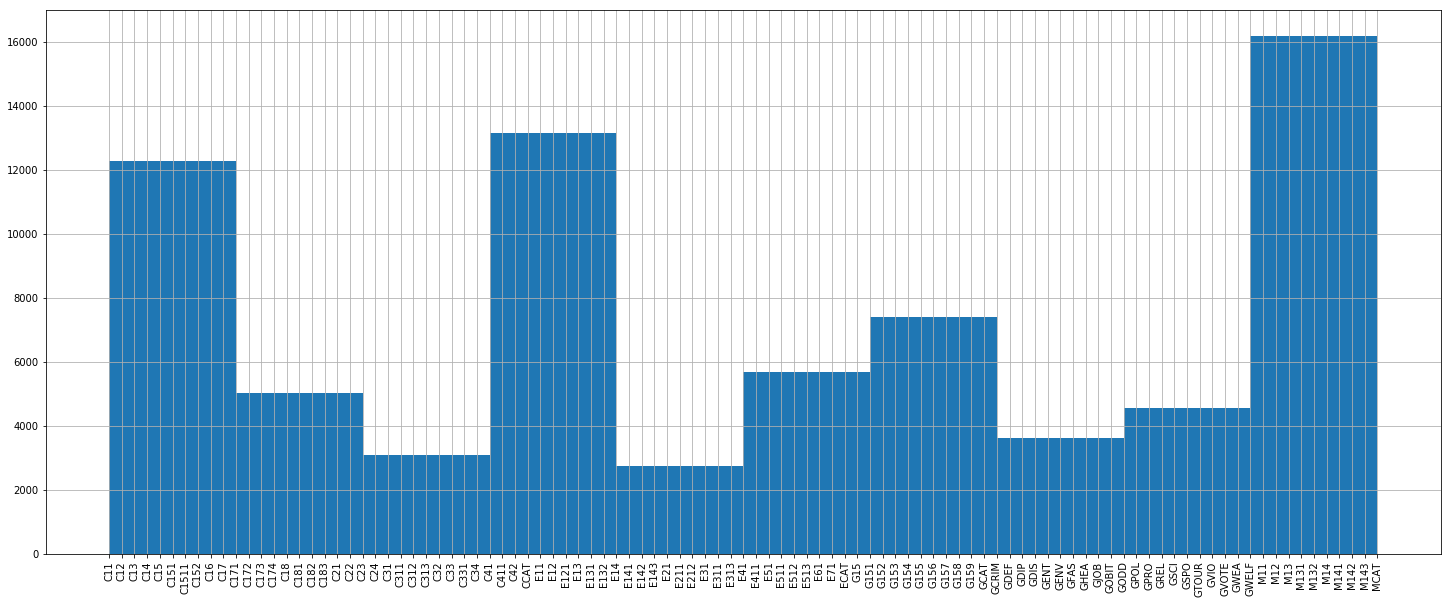

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10);
ax.hist(train_all_labels);
plt.xticks(rotation=90);
ax.grid();